# Practice


** Problem 1**

Explore the Wine data set, which contains 13 attributes (features) and three classes (types of wine). Use the _iris_ _flower_ example presented in the class to:

1) Create a dataframe from the raw data. Understand dimensions, types of variables, feature names.

2) Learn how to get a single column from the dataframe, computes mean and std along each columns.

3) Plot the distributions of features (histograms), understand which features have more variability (potentially might be good discriminative features)

4) Create 'X' and 'y' dataframes, which correspond to features and class labels respectively.

5) Split the entire data set into _training_ and _test_ sets

6) Learn a classifier on the training set and check its performance in the test set

7) Plot the confusion matrix and compute the accuracy score: a single number which summarises the performance of the classifier

(continue with the code presented below)


In [3]:
# datafrane object
import pandas as pd

# general library for numerical tensors
import numpy as np

# data visualisation
import seaborn as  sns
import matplotlib.pyplot as plt

# import 'datasets' library from sci0kit learn ML package
from sklearn import datasets

# import a simple linear classification algorithm: logistic regression
from sklearn import linear_model

# import a metric for the assessment of accuracy of classification
from sklearn import metrics

# obtain the wine data set
wine_data = datasets.load_wine()

In [4]:
# (1)
df = pd.DataFrame(data=wine_data.data,columns=wine_data.feature_names)
df.shape

(178, 13)

In [8]:
# (2)
df.head()
df.iloc[:,:3]
df.mean(axis = 1)
df.std(axis = 0)

alcohol                           0.811827
malic_acid                        1.117146
ash                               0.274344
alcalinity_of_ash                 3.339564
magnesium                        14.282484
total_phenols                     0.625851
flavanoids                        0.998859
nonflavanoid_phenols              0.124453
proanthocyanins                   0.572359
color_intensity                   2.318286
hue                               0.228572
od280/od315_of_diluted_wines      0.709990
proline                         314.907474
dtype: float64

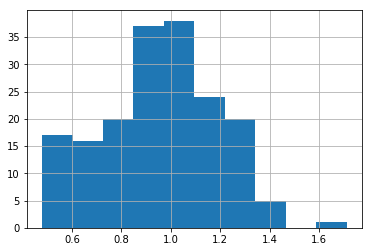

In [9]:
# (3)
df.hue.hist()

In [10]:
X = df
y = pd.DataFrame(data=wine_data.target,columns=['class'])
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.25)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
knn.predict(X_test)
knn.score(X_test,y_test)

C:\Python27\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7111111111111111

In [22]:
clf = linear_model.LogisticRegression()
clf.fit(X_train,y_train)
clf.predict(X_test)
clf.score(X_test,y_test)

C:\Python27\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9333333333333333

In [29]:
df_pred = pd.concat((X_test, y_test),axis=1)
df_pred['y_pred'] = clf.predict(X_test)
df_pred.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,y_pred
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0,1,1
35,13.48,1.81,2.41,20.5,100.0,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920.0,0,0
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1,1
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0,1,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,0


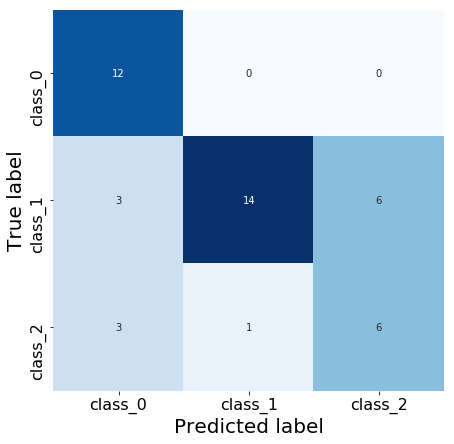

In [21]:
from sklearn import metrics
conf_matrx = metrics.confusion_matrix(y_true=y_test, y_pred=knn.predict(X_test))
plt.figure(figsize=(7,7))
sns.heatmap(conf_matrx, cmap='Blues', annot=True, cbar=False)
plt.xticks([0.5,1.5,2.5], wine_data.target_names, fontsize=16)
plt.yticks([0.5,1.5,2.5], wine_data.target_names, fontsize=16)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

**Problem 2**

Explore the Titanic data set (included in the folder 'data'). Repeat the exploration steps mentioned in *Practice 1*.

The outcome / class you will be predicting is the survival probability (rounded to binary values 1/0) and labeled by **'survived'** column. 

1) Understand how the data were loaded into pandas dataframe and split into features and outcomes (see below).

2) Train a classifier using all features and also a random subset ().

3) Explore various feature subset which produce higher classification accuracy. For example, features ['class', 'age', 'sex']

** amazing tutorial using this data set:** https://www.kaggle.com/startupsci/titanic-data-science-solutions


In [63]:
df_titanic_data = pd.read_excel('data/titanic.xls')

In [64]:
print df_titanic_data.head()

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [65]:
# I split the entire data set into 'features' and the 'outcomes'
# X - features (13 attributes) and y - outcome binary variable: survived 1, did not survive = 0
X, y = df_titanic_data.loc[:,df_titanic_data.columns !='survived'], df_titanic_data.survived